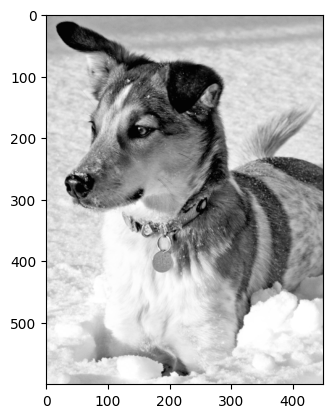

(600, 450)


In [250]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.linalg import svd
import cv2

img = Image.open('data/dog.jpg').convert("L")
resized_img = img.resize((round(img.size[0]*0.3), round(img.size[1]*0.3)))
img = np.array(resized_img)


plt.imshow(img, cmap="gray")
plt.show()
print(img.shape)
n, m = img.shape


In [251]:
U, S, VT = svd(img, full_matrices=False)
S = np.diag(S)
print(U.shape)
print(S.shape)
print(VT.shape)

(600, 450)
(450, 450)
(450, 450)


In [252]:
r = 3 #rank r < m
U_r = U[:, :r]
print(U_r @ np.transpose(U_r) )
print(f'this is clearly not the {r} x {r} identity')

[[0.00197131 0.00196599 0.00195559 ... 0.00289269 0.00292504 0.00293908]
 [0.00196599 0.00196085 0.00195057 ... 0.00288222 0.00291401 0.00292776]
 [0.00195559 0.00195057 0.0019405  ... 0.00286069 0.00289178 0.00290532]
 ...
 [0.00289269 0.00288222 0.00286069 ... 0.00450518 0.00457229 0.00459675]
 [0.00292504 0.00291401 0.00289178 ... 0.00457229 0.00464194 0.00466734]
 [0.00293908 0.00292776 0.00290532 ... 0.00459675 0.00466734 0.00469323]]
this is clearly not the 3 x 3 identity


In [253]:
print(np.transpose(U_r) @ U_r)
print(f'this however, IS the {r} x {r} identity')

[[ 1.00000000e+00 -1.11022302e-16 -2.77555756e-17]
 [-1.11022302e-16  1.00000000e+00 -2.12503626e-17]
 [-2.77555756e-17 -2.12503626e-17  1.00000000e+00]]
this however, IS the 3 x 3 identity


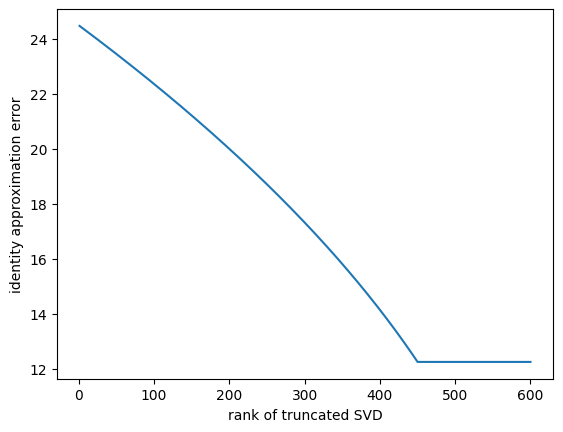

In [254]:
errors = np.zeros(n)
r_values = np.arange(1, n+1, 1)

for r in r_values:
    U_r = U[:, :r]
    errors[r-1] = np.linalg.norm(np.eye(n) - (U_r @ np.transpose(U_r)))

plt.plot(r_values, errors)
plt.xlabel('rank of truncated SVD')
plt.ylabel('identity approximation error')
plt.show()


<Figure size 1200x600 with 0 Axes>

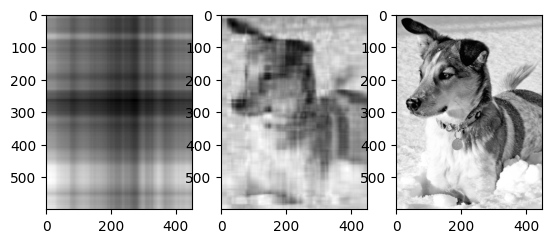

In [255]:
#try to reconstruct the original picture with a rank-1 truncated SVD
plt.figure(figsize=(12,6))
f, axarr = plt.subplots(1, 3)
i = 0
for r in [1, 10, m]:
    U_r = U[:,:r]
    VT_r = VT[:r, :]
    S_r = S[0:r, :r]
    img_reconstruct = U_r @ S_r @ VT_r
    axarr[i].imshow(img_reconstruct, cmap='gray')
    i +=1

plt.savefig('figure.png')


(600, 450)
(450, 450)


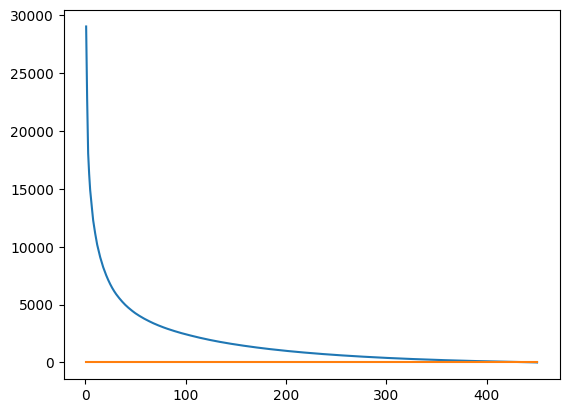

In [265]:
errors = np.zeros(m)
cum_error = np.zeros(m)
r_vals = np.arange(1, m+1, 1)
trigger = 0
print(U.shape)
print(VT.shape)

for r in r_vals:
    U_r =   U[:, :r]
    S_r = S[0:r, :r]
    VT_r = VT[:r, :]

    img_reconstruct = U_r @ S_r @ VT_r
    error = np.linalg.norm((img - img_reconstruct), 'fro')
    errors[r-1] = error

cumsum = np.cumsum(np.diag(S))
missing_variance_fraction = np.square(errors)
plt.plot(r_vals, errors)

plt.plot(r_vals, np.zeros(np.size(r_vals)))

plt.show()

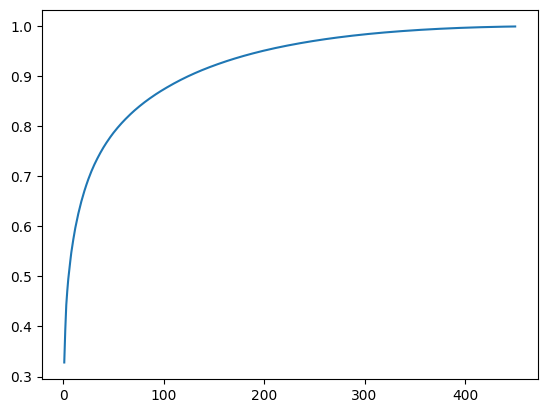

In [270]:
plt.plot(np.arange(1, np.size(np.diag(S))+1), cumsum/np.sum(np.diag(S)))


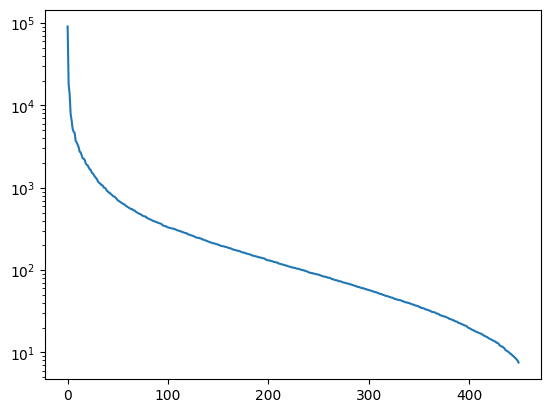

In [274]:
plt.semilogy(np.diag(S))
